<a href="https://colab.research.google.com/github/Arvindkale123/global-terrorism-exploratorydata-analysis/blob/main/private_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
# importing numpy and pands library 
import numpy as pd
import pandas as pd

In [2]:
# importing matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the csv file from drive
df=pd.read_csv('/content/drive/MyDrive/Global Terrorism.csv', encoding = "ISO-8859-1", engine='python')

In [ ]:
# printing  the head of csv to lookup at the data
df.head()

In [6]:
#  a list of column which are required in data analysis
column_to_keep=['iyear','imonth','iday','country','country_txt','region','region_txt','provstate','attacktype1_txt','targtype1_txt','ransomamt','gname','city','nkill']

In [7]:
# storing the data of required columns by making a copy
global_terror_df=df[column_to_keep].copy()

In [8]:
# renaming the columns of dataframe
global_terror_df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country_name','region_txt':'region_name','attacktype1_txt':'attack_type','targtype1_txt':'target_type','gname':'gang_name','nkill':'people_killed'}, inplace = True)

In [9]:
# print the head of updated name dataframe
global_terror_df.head()

,year,month,day,country,country_name,region,region_name,provstate,attack_type,target_type,ransomamt,gang_name,city,people_killed
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Assassination,Private Citizens & Property,NaN,MANO-D,Santo Domingo,1.0
1,1970,0,0,130,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),Government (Diplomatic),800000.0,23rd of September Communist League,Mexico city,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Assassination,Journalists & Media,NaN,Unknown,Unknown,1.0
3,1970,1,0,78,Greece,8,Western Europe,Attica,Bombing/Explosion,Government (Diplomatic),NaN,Unknown,Athens,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Unknown,Fukouka,NaN


## ***italicized text***
TASKS TO DO
1. RENAME THE COLUMN 
2.REMOVING THE NOT NEEDED COLUMN 
3.PLOT CHART BY NUMBER OF CASUALITITES EACH YEAR WISE(1971-2017)
4.NUMBER OF ATTACKS COUNTRY WISE
5.REGION WISE TERRORIST ACTIVITIES
6.COIUNTRY WISE CASUALITIES TILL NOW
7.TOTAL ATTACK BY TYPE OF ATTACK 
8.CITY WISE DEATHS 
9.TERRORIST ACTIVIES BY GROUP LIKE TALIBAN ETC
10.TARGET TYPE GOVT OR PUBLIC ATTACK
11.RANSOM COLLECTED COUNTRY WISE


In [15]:
# storing the data required to calcualte death by year in a new dataframe
year_people_killed_df=global_terror_df[['year','people_killed']]

In [11]:
# using groupby function and sum functoin to sum the data of number of peoples killedeach year
total_killings_df=year_people_killed_df.groupby('year')['people_killed'].sum()

In [ ]:
total_killings_df.head()
             

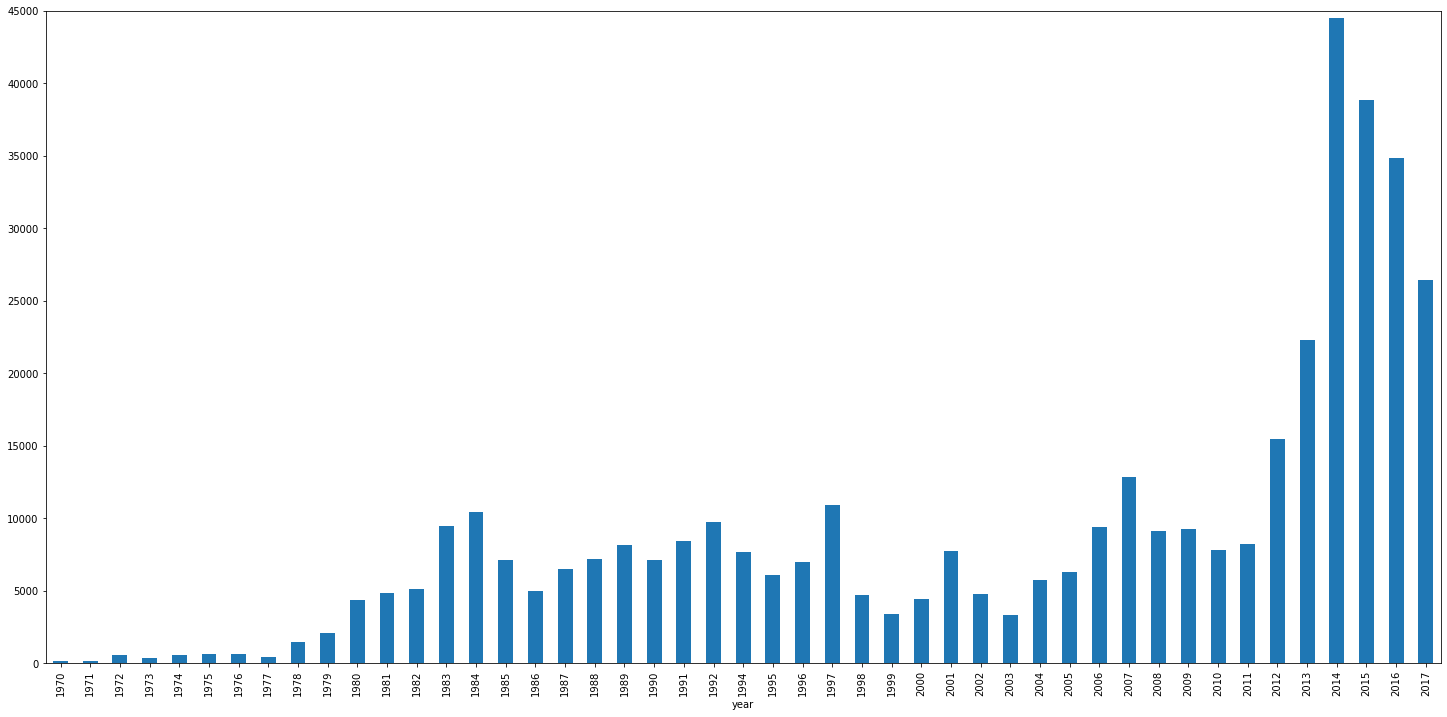

In [115]:
# ploting the bar gragh of people killed each year
ax = total_killings_df.plot.bar(x='year', y='people_killed', rot=0,figsize=(25, 12),ylim=(0,45000))
plt.xticks(x='year', rotation='vertical')
plt.margins(0.2)

In [108]:
country_wise_attack = global_terror_df.groupby('country_name')['year'].count().reset_index()

In [109]:
country_wise_attack.rename(columns={'year':'number_of_attack'},inplace=True)


In [110]:
country_wise_attack.sort_values(by='number_of_attack', ascending=False, kind='quicksort', inplace = True)

In [101]:
country_wise_attack=country_wise_attack.set_index('country_name')

In [111]:
top_50_affected_countries_df=country_wise_attack.head(50)

In [ ]:
top_50_affected_countries_df

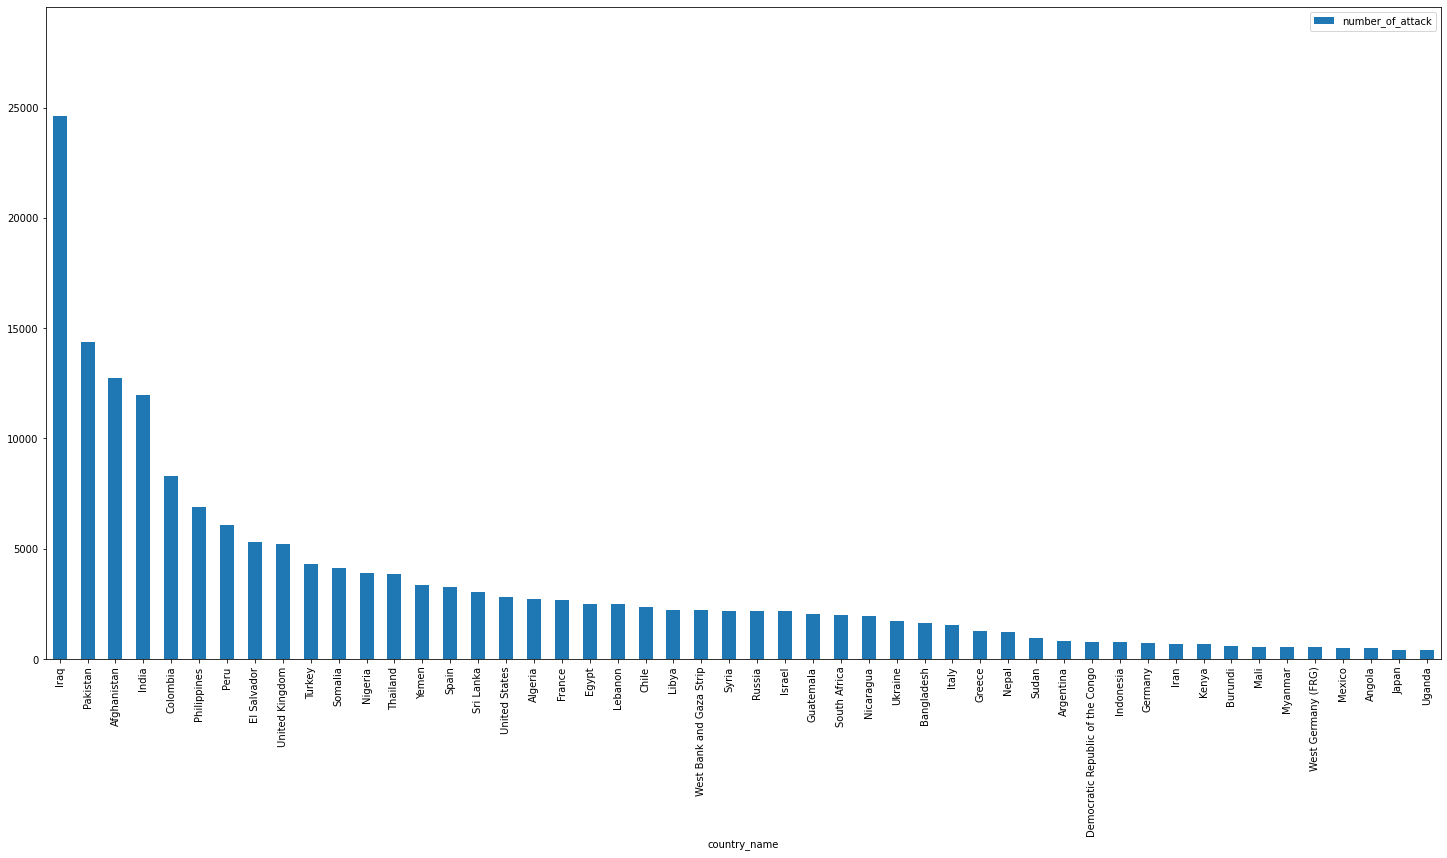

In [114]:
ax = top_50_affected_countries_df.plot.bar(x='country_name', y='number_of_attack', rot=0,figsize=(25, 12))
plt.xticks(x='country_name', rotation='vertical')
plt.margins(0.2)